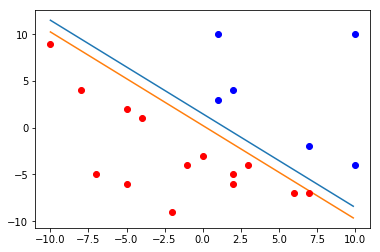

In [44]:
%matplotlib inline
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


MIN_WEIGHT = -5
MAX_WEIGHT = 5
MIN_POINT = -10
MAX_POINT = 10
NUM_POINTS = 20


def gen_target_func():
    w_0 = float(random.randint(MIN_WEIGHT, MAX_WEIGHT))
    w_1 = float(random.randint(MIN_WEIGHT, MAX_WEIGHT))
    w_2 = float(random.randint(MIN_WEIGHT, MAX_WEIGHT))
    return [w_0, w_1, w_2]


def gen_data(w):
    x_blue = []
    x_red = []
    for i in range(NUM_POINTS):
        x1_t = float(random.randint(MIN_POINT, MAX_POINT))
        x2_t = float(random.randint(MIN_POINT, MAX_POINT))
        x_t = [1, x1_t, x2_t]
        if np.sign(np.dot(w , x_t)) > 0:
            x_blue.append(x_t)
        else:
            x_red.append(x_t)
    return x_blue, x_red

    
def graph(w, x_blue, x_red, w_learned):
    x1_blue = [i[1] for i in x_blue]
    x2_blue = [i[2] for i in x_blue]
    x1_red = [i[1] for i in x_red]
    x2_red = [i[2] for i in x_red]
    x = np.arange(MIN_POINT, MAX_POINT, 0.1)
    y = ((-w[1]/w[2])*x) - (w[0]/w[2])
    y_learned = ((-w_learned[1]/w_learned[2])*x) - (w_learned[0]/w_learned[2])
    plt.plot(x, y)
    plt.plot(x, y_learned)
    plt.plot(x1_blue, x2_blue, 'bo')
    plt.plot(x1_red, x2_red, 'ro')
    
    
def pla(w_t, y, x):
    return w_t + np.multiply(y, x)
    
    
def main():
    random.seed(100)
    w_target = gen_target_func()
    x_blue, x_red = gen_data(w_target)
    
    sess = tf.Session()
    # x_2 + 0*x_1 + 0 = 0
    w_node = tf.Variable([0., 0., 1.], tf.float32)
    x_node = tf.placeholder(tf.float32, shape=[3])
    perceptron = tf.sign(tf.reduce_sum(w_node * x_node))
    init = tf.global_variables_initializer()
    sess.run(init)
    
    while True:
        num_misclassified = 0
        for i in x_blue:
            y = sess.run(perceptron, {x_node: i})
            if y == 1.0:
                continue
            elif y == -1.0:
                num_misclassified += 1
                fix_w_node = tf.assign(w_node, pla(sess.run(w_node), 1, i))
                sess.run(fix_w_node)
            else:
                print('Floats are hard')
        for i in x_red:
            y = sess.run(perceptron, {x_node: i})
            if y == -1.0:
                continue
            elif y == 1.0:
                num_misclassified += 1
                fix_w_node = tf.assign(w_node, pla(sess.run(w_node), -1, i))
                sess.run(fix_w_node)
            else:
                print('Floats are hard')
        if not num_misclassified:
            break
            
    graph(w_target, x_blue, x_red, sess.run(w_node))
    
    
main()